In [1]:

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from skimage import color
import skimage.filters as filters
from skimage.transform import hough_circle
from skimage.feature import peak_local_max
from skimage import feature
from skimage import morphology
from skimage.draw import circle_perimeter
from skimage import img_as_float, img_as_ubyte
from skimage import segmentation as seg
from skimage.morphology import watershed
from scipy import ndimage as nd
from scipy.ndimage import convolve
from skimage import feature
from skimage.transform import resize
import glob # for bulk file import
import os

Setting some parameters

In [ ]:
# Set defaults
plt.rcParams['image.cmap'] = 'gray' # Display grayscale images in... grayscale.
plt.rcParams['image.interpolation'] = 'none' # Use nearest-neighbour
plt.rcParams['figure.figsize'] = 10, 10

In [3]:
os.chdir("/home/guido/NEU")

In [9]:
imgpaths = glob.glob("./GitHub/Image_Analysis_in_Python/images/*.*")
imgset = [mpimg.imread(x) for x in imgpaths]

In [10]:
imgpaths

['./GitHub/Image_Analysis_in_Python/images/n02958343_263.JPEG',
 './GitHub/Image_Analysis_in_Python/images/n02958343_273.JPEG',
 './GitHub/Image_Analysis_in_Python/images/n02958343_282.JPEG']

In [11]:
# Find horizontal edges using a simple shifting method
def find_horizontal_edges(img):
    imgbw = img_as_float(color.rgb2grey(img))
    return np.abs(imgbw[:, 1:] - imgbw[:, :-1])

# Find vertical edges using a simple shifting method
def find_vertical_edges(img):
    imgbw = img_as_float(color.rgb2grey(img))
    return np.abs(imgbw[1:, :] - imgbw[:-1, :])
    
# Downsample an image by skipping indicies
def downsample_image(img, skip):
     return img[::skip,::skip]
    

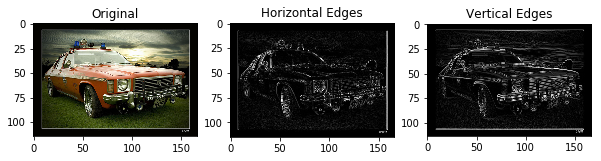

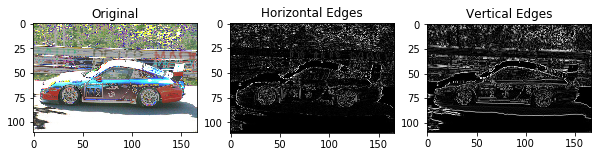

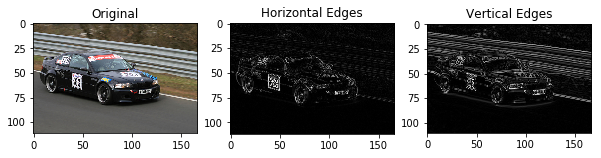

In [12]:
# Apply to image set
for i,img in enumerate(imgset):
    img = downsample_image(img, 3) # downsample    
    plt.figure()
    plt.subplot(1, 3, 1)
    plt.title('Original')
    plt.imshow(img)
    plt.subplot(1, 3, 2)
    plt.title('Horizontal Edges')
    plt.imshow(find_horizontal_edges(img))
    plt.subplot(1, 3, 3)
    plt.title('Vertical Edges')
    plt.imshow(find_vertical_edges(img))